In [1]:
# Interactive shell of Ipython is used to execute multiple statements at a time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skt
import seaborn as sns

In [3]:
aw_df = pd.read_excel('Adventure_Works_DB_2013.xlsx')
aw_df.head()
aw_df.describe()

,CustomerKey,EnglishProductCategoryName,Model,Country,Region,Age,IncomeGroup,CalendarYear,OrderDate,OrderNumber,LineNumber,Quantity,Amount
0,11000,Bikes,Mountain-200,Australia,Pacific,49,High,2013,2013-01-18,SO51522,1,1,2319.99
1,11000,Accessories,Fender Set - Mountain,Australia,Pacific,49,High,2013,2013-01-18,SO51522,2,1,21.98
2,11000,Bikes,Touring-1000,Australia,Pacific,49,High,2013,2013-05-03,SO57418,1,1,2384.07
3,11000,Accessories,Touring Tire,Australia,Pacific,49,High,2013,2013-05-03,SO57418,2,1,28.99
4,11000,Accessories,Touring Tire Tube,Australia,Pacific,49,High,2013,2013-05-03,SO57418,3,1,4.99


,CustomerKey,Age,CalendarYear,LineNumber,Quantity,Amount
count,54771.000000,54771.000000,54771.000000,54771.000000,54771.0,54771.00000
mean,18833.144894,51.304157,2013.035968,1.973216,1.0,299.37823
std,5407.123198,11.437086,0.186212,1.024153,0.0,677.39973
min,11000.000000,34.000000,2013.000000,1.000000,1.0,2.29000
25%,14011.000000,42.000000,2013.000000,1.000000,1.0,4.99000
50%,18176.000000,49.000000,2013.000000,2.000000,1.0,24.99000
75%,23381.500000,59.000000,2013.000000,3.000000,1.0,53.99000
max,29480.000000,104.000000,2014.000000,8.000000,1.0,2443.35000


In [4]:
aw_df.isnull().sum()
aw_df.columns
aw_df.dtypes

CustomerKey                   0
EnglishProductCategoryName    0
Model                         0
Country                       0
Region                        0
Age                           0
IncomeGroup                   0
CalendarYear                  0
OrderDate                     0
OrderNumber                   0
LineNumber                    0
Quantity                      0
Amount                        0
dtype: int64

Index(['CustomerKey', 'EnglishProductCategoryName', 'Model', 'Country',
       'Region', 'Age', 'IncomeGroup', 'CalendarYear', 'OrderDate',
       'OrderNumber', 'LineNumber', 'Quantity', 'Amount'],
      dtype='object')

CustomerKey                            int64
EnglishProductCategoryName            object
Model                                 object
Country                               object
Region                                object
Age                                    int64
IncomeGroup                           object
CalendarYear                           int64
OrderDate                     datetime64[ns]
OrderNumber                           object
LineNumber                             int64
Quantity                               int64
Amount                               float64
dtype: object

In [5]:
#dealing with outliers

product_df = ['EnglishProductCategoryName', 'Model']
product_df_num = aw_df[product_df]
product_df_num.describe()

Q1 =product_df_num.quantile(0.25)
Q3 = product_df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((product_df_num < (Q1 - 1.5 * IQR)) |(product_df_num > (Q3 + 1.5 * IQR))).any()


region_df = ['Country','Region']
region_df_num = aw_df[region_df]
region_df_num.describe()

Q1 =region_df_num.quantile(0.25)
Q3 = region_df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((region_df_num < (Q1 - 1.5 * IQR)) |(region_df_num > (Q3 + 1.5 * IQR))).any()



demographic_df = ['Age', 'IncomeGroup']
demographic_df_num = aw_df[demographic_df]
demographic_df_num.describe()

Q1 =demographic_df_num.quantile(0.25)
Q3 = demographic_df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((demographic_df_num < (Q1 - 1.5 * IQR)) |(demographic_df_num > (Q3 + 1.5 * IQR))).any()

,EnglishProductCategoryName,Model
count,54771,54771
unique,3,37
top,Accessories,Sport-100
freq,35986,6414


Series([], dtype: float64)

EnglishProductCategoryName    False
Model                         False
dtype: bool

,Country,Region
count,54771,54771
unique,6,3
top,United States,North America
freq,19675,26952


Series([], dtype: float64)

Country    False
Region     False
dtype: bool

,Age
count,54771.000000
mean,51.304157
std,11.437086
min,34.000000
25%,42.000000
50%,49.000000
75%,59.000000
max,104.000000


Age    17.0
dtype: float64

Age             True
IncomeGroup    False
dtype: bool

In [6]:
reference_date = pd.to_datetime('2013-12-01')   # reference date

aw_df1 = aw_df.loc[(aw_df['OrderDate'] < '2013-12-01')]
aw_df1.head()

,CustomerKey,EnglishProductCategoryName,Model,Country,Region,Age,IncomeGroup,CalendarYear,OrderDate,OrderNumber,LineNumber,Quantity,Amount
0,11000,Bikes,Mountain-200,Australia,Pacific,49,High,2013,2013-01-18,SO51522,1,1,2319.99
1,11000,Accessories,Fender Set - Mountain,Australia,Pacific,49,High,2013,2013-01-18,SO51522,2,1,21.98
2,11000,Bikes,Touring-1000,Australia,Pacific,49,High,2013,2013-05-03,SO57418,1,1,2384.07
3,11000,Accessories,Touring Tire,Australia,Pacific,49,High,2013,2013-05-03,SO57418,2,1,28.99
4,11000,Accessories,Touring Tire Tube,Australia,Pacific,49,High,2013,2013-05-03,SO57418,3,1,4.99


In [7]:
aw_df1.columns

Index(['CustomerKey', 'EnglishProductCategoryName', 'Model', 'Country',
       'Region', 'Age', 'IncomeGroup', 'CalendarYear', 'OrderDate',
       'OrderNumber', 'LineNumber', 'Quantity', 'Amount'],
      dtype='object')

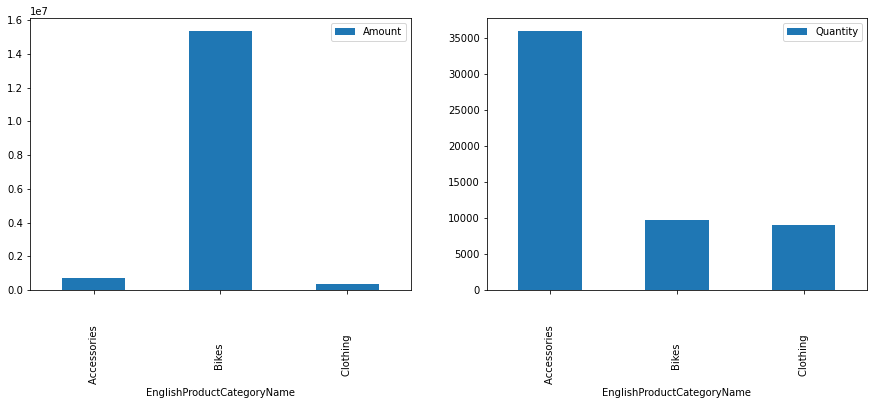

In [8]:
# product category based on amount and quantity

product_df = aw_df[['EnglishProductCategoryName','Amount']]
product_df1 = aw_df[['EnglishProductCategoryName','Quantity']]

#fig, axarr = plt.subplots(2, 2)
#product_df.groupby("EnglishProductCategoryName").sum().plot(kind="bar",ax=axarr[0, 0])
#product_df1.groupby("EnglishProductCategoryName").sum().plot(kind="bar",ax=axarr[0, 1])
#plt.show()

fig, axarr = plt.subplots(1, 2,figsize = (15,5))
product_df.groupby("EnglishProductCategoryName").sum().plot(kind="bar",ax=axarr[0])
product_df1.groupby("EnglishProductCategoryName").sum().plot(kind="bar",ax=axarr[1])


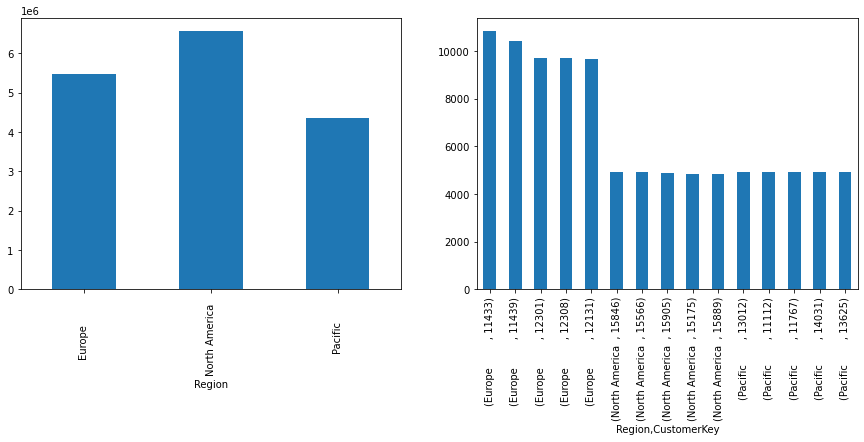

In [9]:
# which region is spending more

R_group = aw_df.groupby(["Region"]).sum()
total_price = R_group["Amount"].groupby(level=0, group_keys=False)

gtp = total_price.nlargest(5)

import numpy as np

# which region is has more number of customers 

R_C_group = aw_df.groupby(["Region",'CustomerKey']).sum()
total_price = R_C_group["Amount"].groupby(level=0, group_keys=False)

gtp1 = total_price.nlargest(5)

fig, axarr = plt.subplots(1, 2,figsize = (15,5))
gtp.plot(kind="bar",ax=axarr[0])
gtp1.plot(kind="bar",ax=axarr[1])

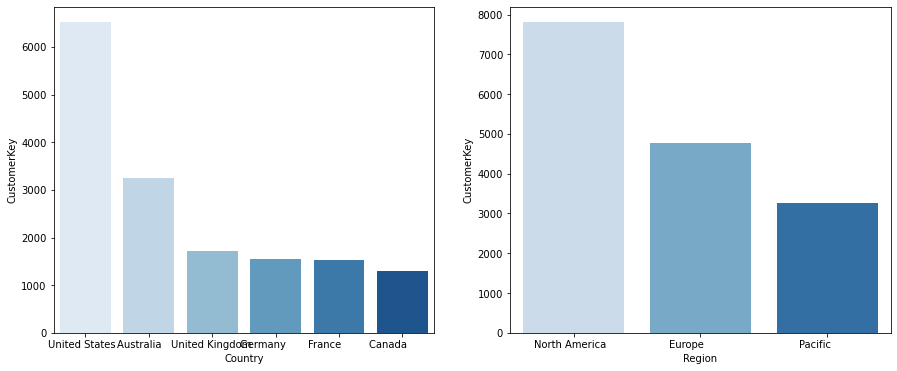

In [10]:
# which region/country is has more number of customers 

fig, axarr = plt.subplots(1, 2,figsize = (15,6))
Customer_Country = aw_df1.groupby('Country')['CustomerKey'].nunique().sort_values(ascending=False).reset_index().head(11)
sns.barplot(data=Customer_Country,x='Country',y='CustomerKey',palette='Blues',orient=True,ax=axarr[0])

Customer_Region = aw_df1.groupby('Region')['CustomerKey'].nunique().sort_values(ascending=False).reset_index().head(11)
sns.barplot(data=Customer_Region,x='Region',y='CustomerKey',palette='Blues',orient=True,ax=axarr[1])


In [11]:
# create recency
#ref_date = '2013-12-01'
df_recency = aw_df1
df_recency = df_recency.groupby(by='CustomerKey',as_index=False)['OrderDate'].max()
df_recency.columns = ['CustomerKey','max_date']

# the diff b/w reference date and max_date is recency
df_recency['Recency'] = df_recency['max_date'].apply(lambda row: (reference_date - row).days)
df_recency.drop('max_date',inplace=True,axis=1)
df_recency[['CustomerKey','Recency']].head()

,CustomerKey,Recency
0,11000,212
1,11001,319
2,11002,281
3,11003,205
4,11004,214


<Figure size 576x360 with 0 Axes>

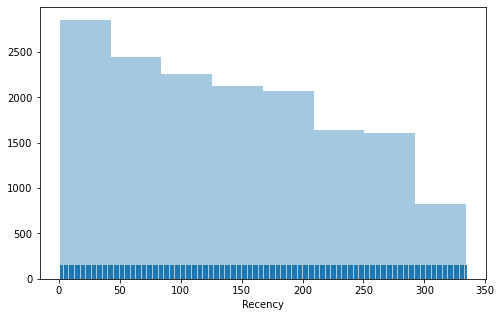

In [12]:
plt.figure(figsize=(8,5))
sns.distplot(df_recency.Recency,bins=8,kde=False,rug=True)

In [13]:
# create frequency

df_frequency = aw_df1
#df_frequency = df_frequency.groupby(by='CustomerKey',as_index=False)['OrderNumber'].nunique()

df_frequency = df_frequency.groupby(by='CustomerKey')['LineNumber'].nunique()


df_frequency.columns = ['CustomerKey','Frequency']
df_frequency.head()

CustomerKey
11000    5
11001    6
11002    2
11003    4
11004    3
Name: LineNumber, dtype: int64

<Figure size 576x360 with 0 Axes>

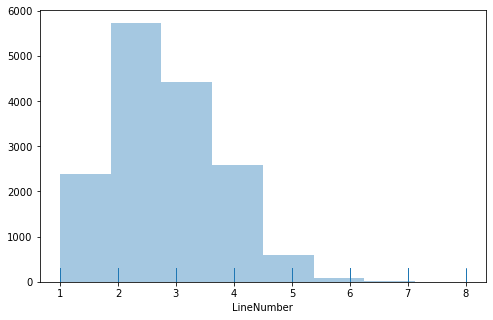

In [14]:
plt.figure(figsize=(8,5))
sns.distplot(df_frequency,bins=8,kde=False,rug=True)

In [15]:
# create Monetary

df_monetary = aw_df1
df_monetary = df_monetary.groupby(by='CustomerKey',as_index=False)['Amount'].sum()

df_monetary.columns = ['CustomerKey','Monetary']
df_monetary.head()

,CustomerKey,Monetary
0,11000,4849.00
1,11001,2419.93
2,11002,2419.06
3,11003,4739.30
4,11004,4796.02


<Figure size 576x360 with 0 Axes>

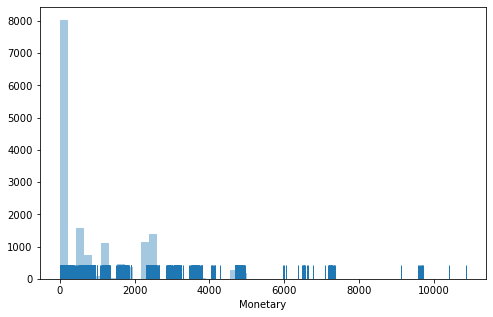

In [16]:
plt.figure(figsize=(8,5))
sns.distplot(df_monetary.Monetary,kde=False,rug=True)

In [17]:
# we have to check RFM 

# lets merge Recency with Frequency
r_f = pd.merge(df_recency,df_frequency,on='CustomerKey')
r_f.head()
r_f.count()

,CustomerKey,Recency,LineNumber
0,11000,212,5
1,11001,319,6
2,11002,281,2
3,11003,205,4
4,11004,214,3


CustomerKey    15834
Recency        15834
LineNumber     15834
dtype: int64

In [18]:
# we have to check RFM 

# lets merge Recency and Frequency with Monetary
r_f_m = r_f.merge(df_monetary,on='CustomerKey')
r_f_m.head()
r_f_m.count()

,CustomerKey,Recency,LineNumber,Monetary
0,11000,212,5,4849.00
1,11001,319,6,2419.93
2,11002,281,2,2419.06
3,11003,205,4,4739.30
4,11004,214,3,4796.02


CustomerKey    15834
Recency        15834
LineNumber     15834
Monetary       15834
dtype: int64

In [19]:
#r_f_m.set_index('CustomerKey',inplace=True)
r_f_m.head()

,CustomerKey,Recency,LineNumber,Monetary
0,11000,212,5,4849.00
1,11001,319,6,2419.93
2,11002,281,2,2419.06
3,11003,205,4,4739.30
4,11004,214,3,4796.02


Text(0.5, 1.0, 'Scatter Plot for Recency and Frequency')

Text(0.5, 0, 'Recency')

Text(0, 0.5, 'Frequency')

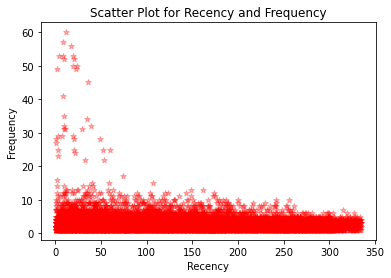

In [21]:
# Recency VS Frequrency

plt.scatter(r_f_m.groupby('CustomerKey')['Recency'].sum(), aw_df1.groupby('CustomerKey')['Quantity'].sum(),
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Recency and Frequency') 
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Scatter Plot for Recency and Frequency')

Text(0.5, 0, 'Recency')

Text(0, 0.5, 'Frequency')

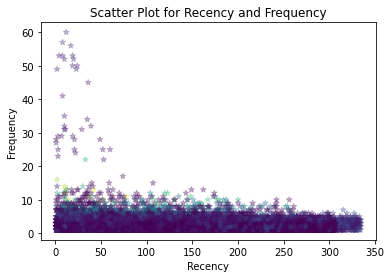

In [22]:
# Recency Vs Frequency with Monetary

Monetary = aw_df1.groupby('CustomerKey')['Amount'].sum()
plt.scatter(r_f_m.groupby('CustomerKey')['Recency'].sum(), aw_df1.groupby('CustomerKey')['Quantity'].sum(),
            marker = '*', alpha = 0.3,c=Monetary)

plt.title('Scatter Plot for Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Scatter Plot for Monetary and Frequency')

Text(0.5, 0, 'Monetary')

Text(0, 0.5, 'Frequency')

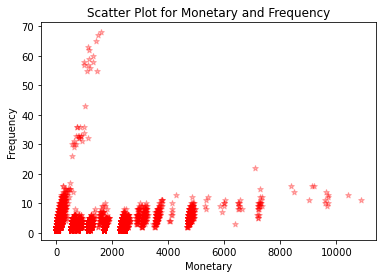

In [23]:
#market_data = aw_df.groupby('OrderDate')[['Quantity', 'Amount']].sum()
market_data = aw_df.groupby('CustomerKey')[['Quantity', 'Amount']].sum()

plt.scatter(market_data['Amount'], market_data['Quantity'],
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

In [24]:
def R_Score(x):
    if x['Recency'] <=60:
        recency = 3
    elif x['Recency'] >60 and x['Recency'] <=120:
        recency = 2
    else:
        recency = 1
    return recency

r_f_m['R'] = r_f_m.apply(R_Score,axis=1)

def F_Score(x):
    if x['LineNumber'] <= 3:
        recency = 3
    elif x['LineNumber'] >3 and x['LineNumber'] <=6:
        recency = 2
    else:
        recency = 1
    return recency

r_f_m['F'] = r_f_m.apply(F_Score,axis=1)
    

In [25]:
pd.qcut(r_f_m['Monetary'],q=3).head()

0    (1120.49, 10860.57]
1    (1120.49, 10860.57]
2    (1120.49, 10860.57]
3    (1120.49, 10860.57]
4    (1120.49, 10860.57]
Name: Monetary, dtype: category
Categories (3, interval[float64]): [(2.289, 69.97] < (69.97, 1120.49] < (1120.49, 10860.57]]

In [26]:
M_Score = pd.qcut(r_f_m['Monetary'],q=3,labels=range(1,4))
r_f_m = r_f_m.assign(M = M_Score.values)

In [27]:
r_f_m.head()

,CustomerKey,Recency,LineNumber,Monetary,R,F,M
0,11000,212,5,4849.00,1,2,3
1,11001,319,6,2419.93,1,2,3
2,11002,281,2,2419.06,1,3,3
3,11003,205,4,4739.30,1,2,3
4,11004,214,3,4796.02,1,3,3


In [28]:
def RFM_Score(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
r_f_m['RFM_Score'] = r_f_m.apply(RFM_Score,axis=1)

In [29]:
r_f_m.head()

,CustomerKey,Recency,LineNumber,Monetary,R,F,M,RFM_Score
0,11000,212,5,4849.00,1,2,3,123
1,11001,319,6,2419.93,1,2,3,123
2,11002,281,2,2419.06,1,3,3,133
3,11003,205,4,4739.30,1,2,3,123
4,11004,214,3,4796.02,1,3,3,133


In [30]:

#The code below allows us to create a new column “segment” which represents the segment in which our customer is located.
#We first start to identify the segments: ‘Lost Cheap customers’,’Lost Customer,’Best Customers’, and ’Almost Customers’.
#We assign ‘others’ for others

segment = [0]*len(r_f_m)
#r_f_m['segment'] = segment

best = list(r_f_m.loc[r_f_m['RFM_Score']=='333'].index)
lost_cheap = list(r_f_m.loc[r_f_m['RFM_Score']=='111'].index)
lost = list(r_f_m.loc[r_f_m['RFM_Score']=='133'].index)
lost_almost = list(r_f_m.loc[r_f_m['RFM_Score']=='233'].index)

for i in range(0,len(r_f_m)):
    if r_f_m['RFM_Score'][i]=='111':
        segment[i]='Lost Cheap Customers'
    elif r_f_m['RFM_Score'][i]=='133':
        segment[i]='Lost Customers'
    elif r_f_m['RFM_Score'][i]=='233':
        segment[i]='Almost Lost Customers'
    elif r_f_m['RFM_Score'][i]=='333':
        segment[i]='Best Customers'
    else:
        segment[i]='Others'

In [31]:

best = list(r_f_m.loc[r_f_m['RFM_Score']=='333'].index)
lost_cheap = list(r_f_m.loc[r_f_m['RFM_Score']=='111'].index)
lost = list(r_f_m.loc[r_f_m['RFM_Score']=='133'].index)
lost_almost = list(r_f_m.loc[r_f_m['RFM_Score']=='233'].index)

In [32]:
#The customers in the ‘Loyal customers’ segment are then identified and assigned to ‘segment’ as well

loyal = list(r_f_m.loc[r_f_m['F']==3].index)
loyal2=[]
for i in loyal:
    if i not in best and i not in lost and i not in lost_cheap and i not in lost_almost:
            loyal2.append(i)
for i in r_f_m.index:
    if i in loyal2:
        segment[i] = 'Loyal Customers'

r_f_m.head()

,CustomerKey,Recency,LineNumber,Monetary,R,F,M,RFM_Score
0,11000,212,5,4849.00,1,2,3,123
1,11001,319,6,2419.93,1,2,3,123
2,11002,281,2,2419.06,1,3,3,133
3,11003,205,4,4739.30,1,2,3,123
4,11004,214,3,4796.02,1,3,3,133


In [33]:
#The customers in the ‘big spenders’ segment are then identified and assigned to ‘segment’ as well

big = list(r_f_m.loc[r_f_m['M']==3].index)
big2=[]
for i in big:
    if i not in best and i not in lost and i not in lost_cheap and i not in lost_almost:
            big2.append(i)
for i in r_f_m.index:
    if i in big2:
        segment[i] = 'Big Spenders'

r_f_m.head()

,CustomerKey,Recency,LineNumber,Monetary,R,F,M,RFM_Score
0,11000,212,5,4849.00,1,2,3,123
1,11001,319,6,2419.93,1,2,3,123
2,11002,281,2,2419.06,1,3,3,133
3,11003,205,4,4739.30,1,2,3,123
4,11004,214,3,4796.02,1,3,3,133


In [34]:
r_f_m['segment'] = segment

In [35]:
r_f_m.head(20)

,CustomerKey,Recency,LineNumber,Monetary,R,F,M,RFM_Score,segment
0,11000,212,5,4849.00,1,2,3,123,Big Spenders
1,11001,319,6,2419.93,1,2,3,123,Big Spenders
2,11002,281,2,2419.06,1,3,3,133,Lost Customers
3,11003,205,4,4739.30,1,2,3,123,Big Spenders
4,11004,214,3,4796.02,1,3,3,133,Lost Customers
5,11005,213,4,4746.34,1,2,3,123,Big Spenders
6,11006,201,1,2384.07,1,3,3,133,Lost Customers
7,11007,257,5,4811.01,1,2,3,123,Big Spenders
8,11008,274,4,4731.32,1,2,3,123,Big Spenders
9,11009,206,2,4716.34,1,3,3,133,Lost Customers


<Figure size 720x576 with 0 Axes>

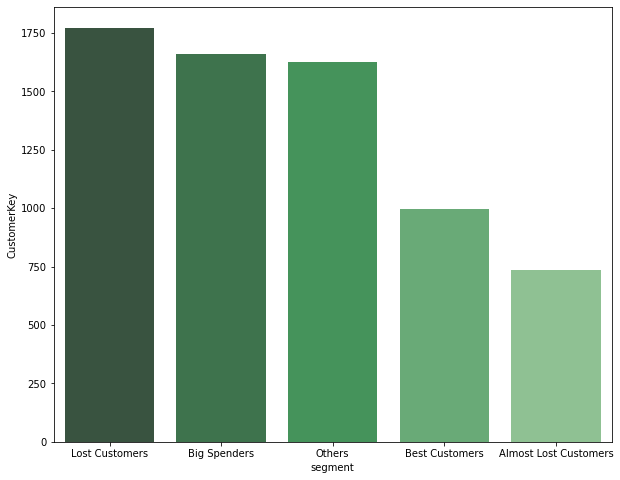

In [36]:
sq1 = r_f_m.groupby('segment')['CustomerKey'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1,x='segment',y='CustomerKey',palette='Greens_d',orient=True)

In [37]:
sq1
mini = min(sq1['CustomerKey'])
mini

,segment,CustomerKey
1,Lost Customers,1773
2,Big Spenders,1659
3,Others,1624
4,Best Customers,996
5,Almost Lost Customers,737


737

In [38]:
import squarify
import matplotlib
cmap = matplotlib.cm.coolwarm
mini = min(sq1['CustomerKey'])
maxi = max(sq1['CustomerKey'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sq1['CustomerKey']]


(0.0, 100.0, 0.0, 100.0)

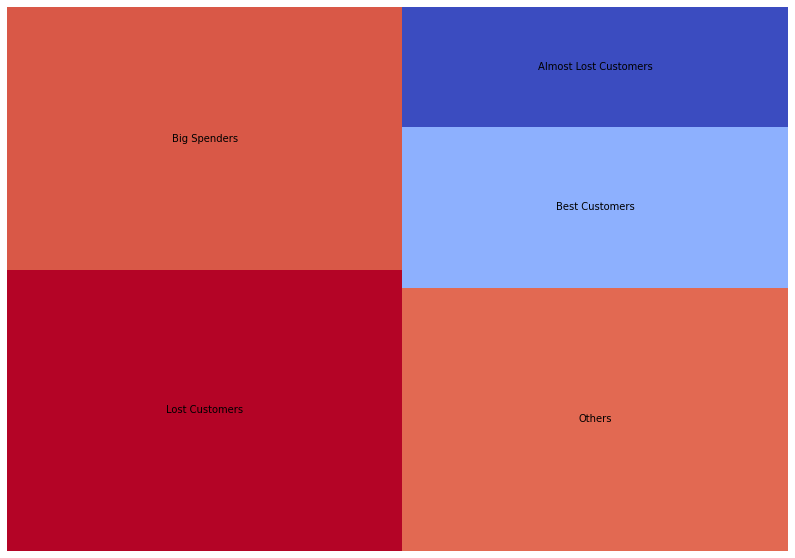

In [39]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14,10)
squarify.plot(sizes=sq1['CustomerKey'], label=sq1.segment,alpha=1,color=colors)
plt.axis('off')
plt.show()

In [42]:
r_f_m.to_excel('RFM_for Tableau.xlsx',sheet_name='RFM')

In [110]:
response_df = pd.read_excel('RFM_Response.xlsx')
response_df.head()
response_df.dtypes

,CustomerKey,Response
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,0


CustomerKey    int64
Response       int64
dtype: object

In [111]:
df_RFM = pd.DataFrame(r_f_m)

df_RFM1 = df_RFM.drop(['segment'],axis=1)

In [112]:
df_RFM = pd.DataFrame(r_f_m)

df_RFMRv = pd.merge(df_RFM,response_df,on='CustomerKey')

df_RFMRv.head()
df_RFMRv.set_index('CustomerKey',inplace=True)

,CustomerKey,Recency,LineNumber,Monetary,R,F,M,RFM_Score,segment,Response
0,11000,212,5,4849.00,1,2,3,123,Big Spenders,0
1,11001,319,6,2419.93,1,2,3,123,Big Spenders,1
2,11002,281,2,2419.06,1,3,3,133,Lost Customers,0
3,11003,205,4,4739.30,1,2,3,123,Big Spenders,0
4,11004,214,3,4796.02,1,3,3,133,Lost Customers,0


In [113]:
# Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_RFMRv['segment']= label_encoder.fit_transform(df_RFMRv['segment']) 

In [114]:
list = ['segment']

df_RFMRv.drop(df_RFMRv[list], axis=1, inplace=True)
df_RFMRv.head()

,Recency,LineNumber,Monetary,R,F,M,RFM_Score,Response
CustomerKey,,,,,,,,
11000,212,5,4849.00,1,2,3,123,0
11001,319,6,2419.93,1,2,3,123,1
11002,281,2,2419.06,1,3,3,133,0
11003,205,4,4739.30,1,2,3,123,0
11004,214,3,4796.02,1,3,3,133,0


# Modelling 

In [115]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(df_RFM1,df_RFMRv['Response'],test_size=0.3,random_state=0)

# lets see the shape of our train and test datasets

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (11083, 8)
X_test shape: (4751, 8)


In [116]:
# now we have to get the predicted values from our trained dataset. 
# fit function will do the job

logistic_regression= LogisticRegression(max_iter=100)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

LogisticRegression()

In [117]:
#summarize missing values - X_train
X_train.isnull().sum()

CustomerKey    0
Recency        0
LineNumber     0
Monetary       0
R              0
F              0
M              0
RFM_Score      0
dtype: int64

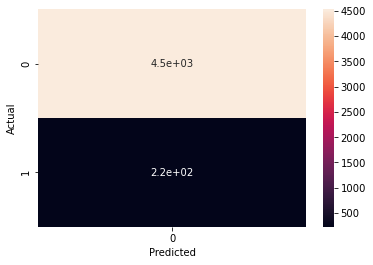

In [118]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

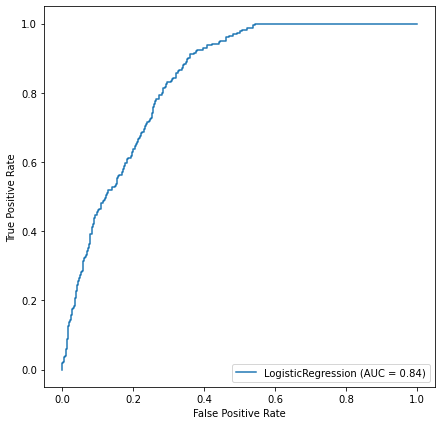

In [119]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(logistic_regression, X_test, y_test, ax = ax)

In [120]:
## we choose F1-score as our metric to evaluate our model.

#Based on the performance metrics below, the best model is Logistic Regression with F1-score of 80%.

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average = "weighted"))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4527
           1       0.00      0.00      0.00       224

    accuracy                           0.95      4751
   macro avg       0.48      0.50      0.49      4751
weighted avg       0.91      0.95      0.93      4751

Accuracy:  0.9528520311513365
0.9298471965988575


C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
# training and predicting
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=4)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [122]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4527
           1       0.70      0.03      0.06       224

    accuracy                           0.95      4751
   macro avg       0.83      0.52      0.52      4751
weighted avg       0.94      0.95      0.93      4751



[[4524    3]
 [ 217    7]]


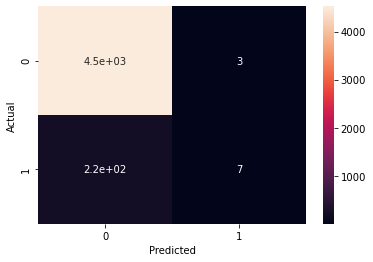

In [123]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

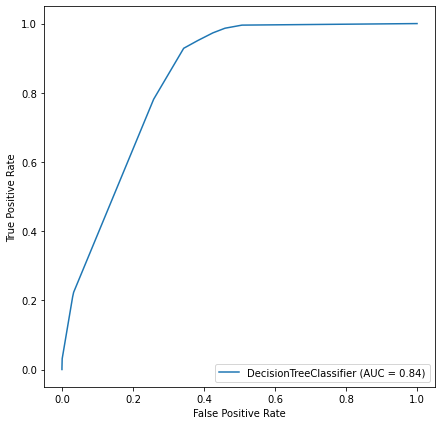

In [124]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(clf, X_test, y_test, ax = ax)

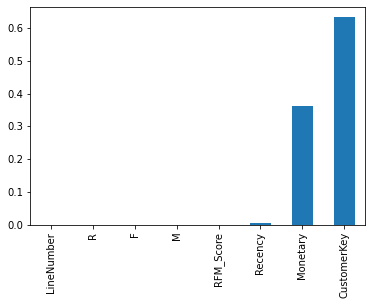

In [125]:
importances = clf.feature_importances_
weights = pd.Series(importances,index=X_train.columns.values)
weights.sort_values()[-10:].plot(kind = 'bar')

In [126]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

RandomForestClassifier(random_state=0)

Model accuracy score with 10 decision-trees : 0.9569


In [128]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4527
           1       0.81      0.11      0.20       224

    accuracy                           0.96      4751
   macro avg       0.88      0.56      0.59      4751
weighted avg       0.95      0.96      0.94      4751



[[4521    6]
 [ 199   25]]


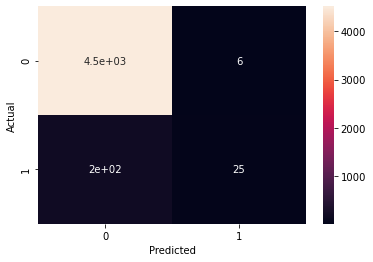

In [127]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

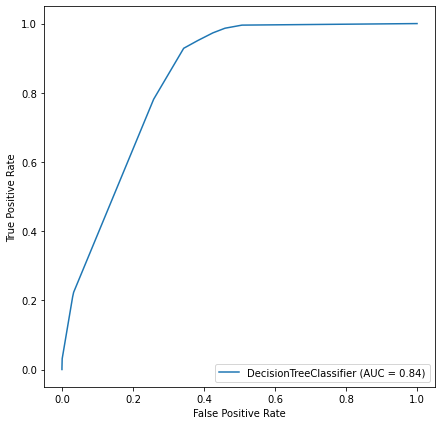

In [129]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(clf, X_test, y_test, ax = ax)

In [130]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

GaussianNB()

In [131]:
# evaluation
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4527
           1       0.00      0.00      0.00       224

    accuracy                           0.95      4751
   macro avg       0.48      0.50      0.49      4751
weighted avg       0.91      0.95      0.93      4751



C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[4527    0]
 [ 224    0]]


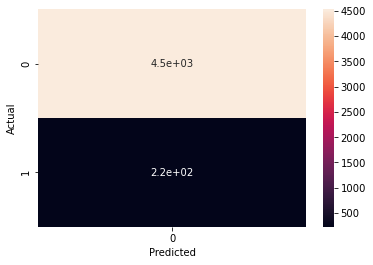

In [132]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

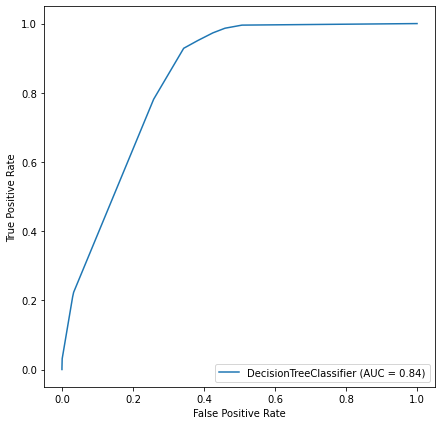

In [133]:
# roc plot
from sklearn.metrics import plot_roc_curve
fig,ax = plt.subplots(figsize=(7,7))
plot_roc_curve(clf, X_test, y_test, ax = ax)